# **Basic model_biulding**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# **Bengaluru_house_price_data**

In [2]:
df=pd.read_csv('/content/bengaluru_house_prices - bengaluru_house_prices.csv')

In [3]:
df.sample()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6615,Super built-up Area,Ready To Move,Kundalahalli,2 BHK,Dieldli,1047,2.0,1.0,91.0


In [4]:
df.nunique()

,0
area_type,4
availability,81
location,1294
size,31
society,2688
total_sqft,2117
bath,19
balcony,4
price,1994


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


# **Data_cleaning**

In [7]:
df=df.drop(columns='society')

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [10]:
df.shape

(12710, 8)

In [11]:
df.duplicated().sum()

np.int64(565)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(12145, 8)

In [14]:
df['total_sqft']=df['total_sqft'].str.extract(r'(\d+\.?\d*)')

In [15]:
df['total_sqft']=df['total_sqft'].astype(float)

In [16]:
df['room']=df['size'].str.extract(r'(\d+\.?\d*)')

In [17]:
df['room']=df['room'].astype(float)

In [18]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12145 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12145 non-null  object 
 1   availability  12145 non-null  object 
 2   location      12145 non-null  object 
 3   size          12145 non-null  object 
 4   total_sqft    12145 non-null  float64
 5   bath          12145 non-null  float64
 6   balcony       12145 non-null  float64
 7   price         12145 non-null  float64
 8   room          12145 non-null  float64
dtypes: float64(5), object(4)
memory usage: 948.8+ KB


In [19]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [20]:
df['size']=df['size'].str.extract(r'(\d+)')

In [21]:
df['size'].unique()

array(['2', '4', '3', '1', '6', '8', '7', '5', '11', '9', '27', '43',
       '14', '12', '10', '13'], dtype=object)

In [22]:
df.drop(columns='size',inplace=True)

In [23]:
df.describe()

,total_sqft,bath,balcony,price,room
count,12145.000000,12145.000000,12145.000000,12145.000000,12145.000000
mean,1516.066343,2.632688,1.582544,107.792364,2.750762
std,1184.373623,1.241918,0.823401,134.203015,1.222206
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1095.000000,2.000000,1.000000,50.000000,2.000000
50%,1263.000000,2.000000,2.000000,70.000000,3.000000
75%,1650.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


# **Data_visualization**

## **Histogram**

<Axes: xlabel='price', ylabel='Count'>

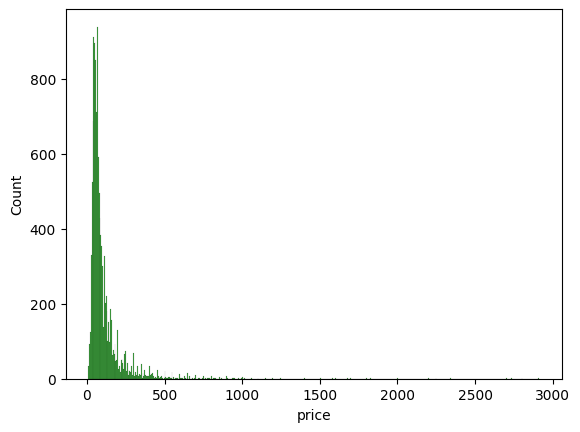

In [24]:
sns.histplot(df['price'],color='green')


<Axes: xlabel='total_sqft', ylabel='Count'>

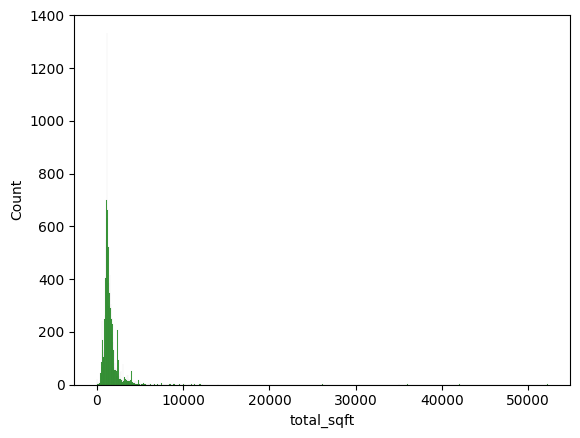

In [25]:
sns.histplot(df['total_sqft'],color='green')

<Axes: xlabel='bath', ylabel='Count'>

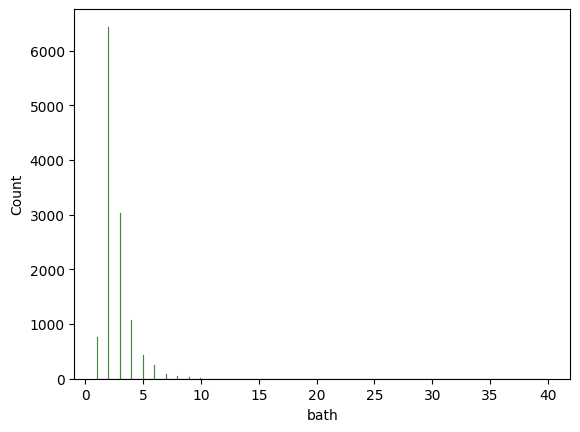

In [26]:
sns.histplot(df['bath'],color='green')

<Axes: xlabel='balcony', ylabel='Count'>

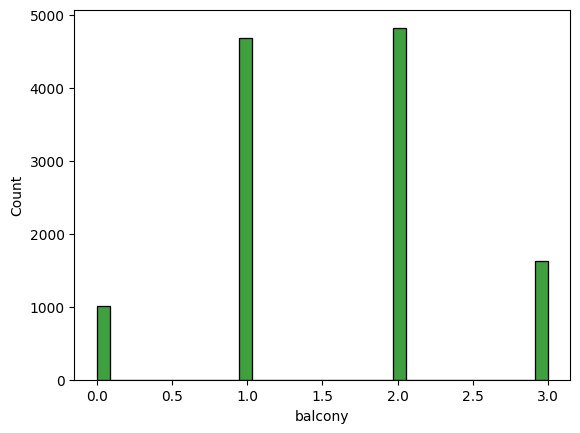

In [27]:
sns.histplot(df['balcony'],color='green')

<Axes: xlabel='total_sqft', ylabel='Count'>

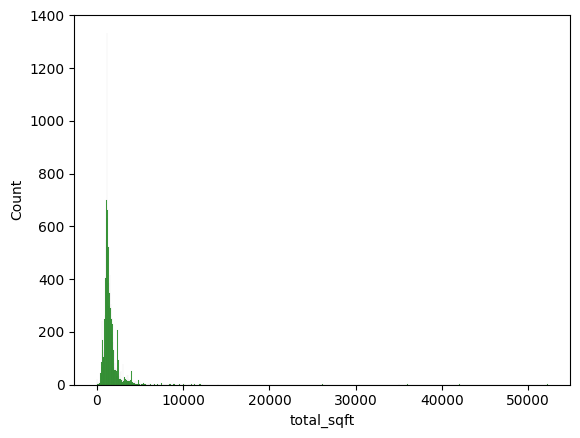

In [28]:
sns.histplot(df['total_sqft'],color='green')

## **Scatter_plot**

<Axes: xlabel='price', ylabel='total_sqft'>

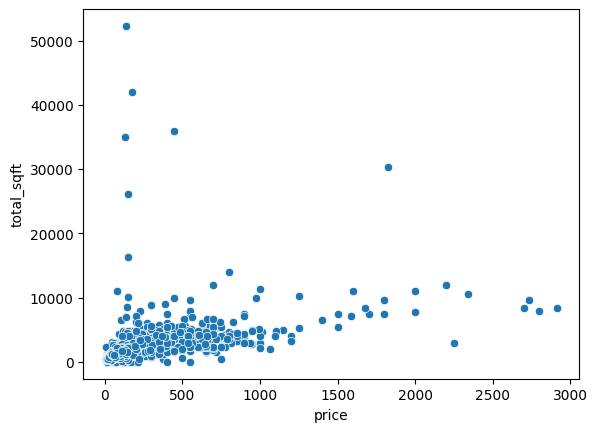

In [29]:
sns.scatterplot(x='price',y='total_sqft',data=df)

<Axes: xlabel='price', ylabel='room'>

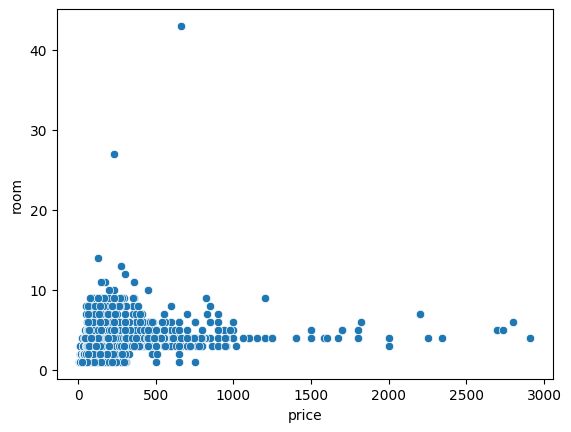

In [30]:
sns.scatterplot(x='price',y='room',data=df)

## **Barplot**

<Axes: xlabel='price', ylabel='room'>

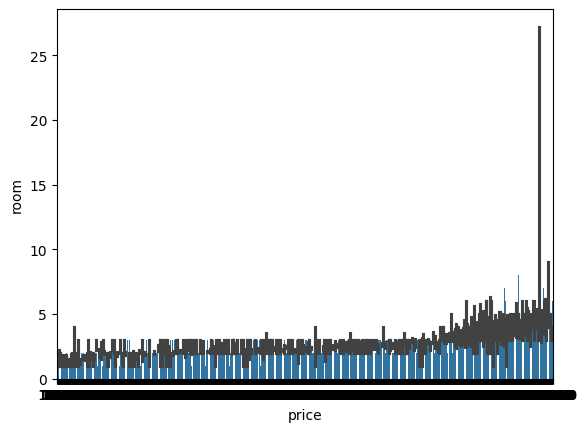

In [31]:
sns.barplot(x='price',y='room',data=df)

## **Box_plot**

<Axes: ylabel='price'>

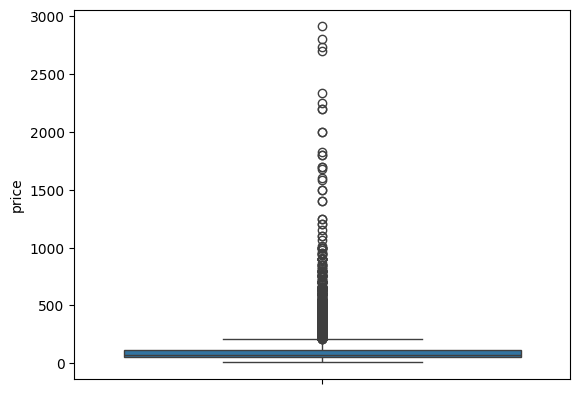

In [32]:
sns.boxplot(y=df['price'])

<Axes: ylabel='total_sqft'>

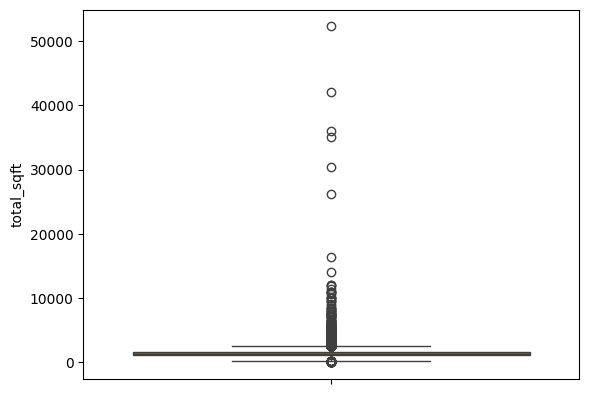

In [33]:
sns.boxplot(y=df['total_sqft'])

<Axes: ylabel='bath'>

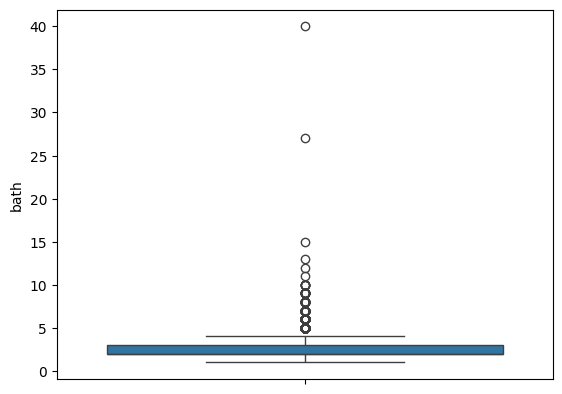

In [34]:
sns.boxplot(y=df['bath'])

**Outliers**

In [35]:
df1=df.copy()

In [36]:
def detect_iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12145 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12145 non-null  object 
 1   availability  12145 non-null  object 
 2   location      12145 non-null  object 
 3   total_sqft    12145 non-null  float64
 4   bath          12145 non-null  float64
 5   balcony       12145 non-null  float64
 6   price         12145 non-null  float64
 7   room          12145 non-null  float64
dtypes: float64(5), object(3)
memory usage: 853.9+ KB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12145 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12145 non-null  object 
 1   availability  12145 non-null  object 
 2   location      12145 non-null  object 
 3   total_sqft    12145 non-null  float64
 4   bath          12145 non-null  float64
 5   balcony       12145 non-null  float64
 6   price         12145 non-null  float64
 7   room          12145 non-null  float64
dtypes: float64(5), object(3)
memory usage: 853.9+ KB


In [39]:
outliers_iqr=df1[['total_sqft','price','bath','balcony']].apply(detect_iqr_outliers)

In [40]:
print(df1.shape)
print(df.shape)

(12145, 8)
(12145, 8)


In [41]:
# df1['log_total_sqft']=np.log1p(df1['total_sqft'])

# **Skewness**

In [42]:
skewness=df1[['total_sqft','price','bath','balcony']].skew()

In [43]:
print(skewness)

total_sqft    17.243788
price          7.762910
bath           4.573627
balcony        0.009576
dtype: float64


In [44]:
df2=df1.copy()

# **Log**

In [45]:
df2[['total_sqft','price','bath','balcony']]=np.log1p(df2[['total_sqft','price','bath','balcony']])

In [46]:
skewness2=df2[['total_sqft','price','bath','balcony']].skew()

In [47]:
print(skewness2)

total_sqft   -1.423229
price         0.832586
bath          0.804019
balcony      -0.871798
dtype: float64


**Checking the skewness after the logerthom**

<Axes: xlabel='total_sqft', ylabel='Density'>

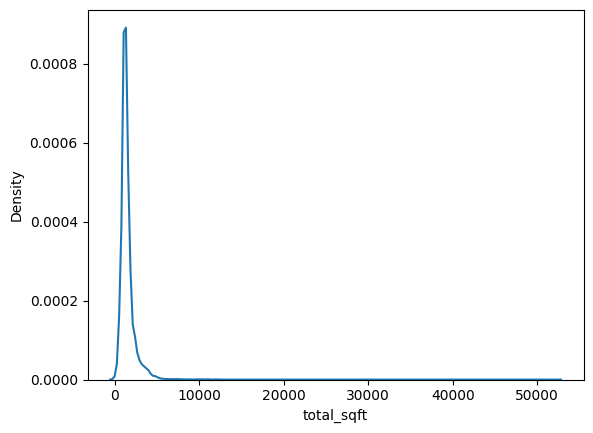

In [48]:
sns.kdeplot(df1['total_sqft'])

<Axes: xlabel='total_sqft', ylabel='Density'>

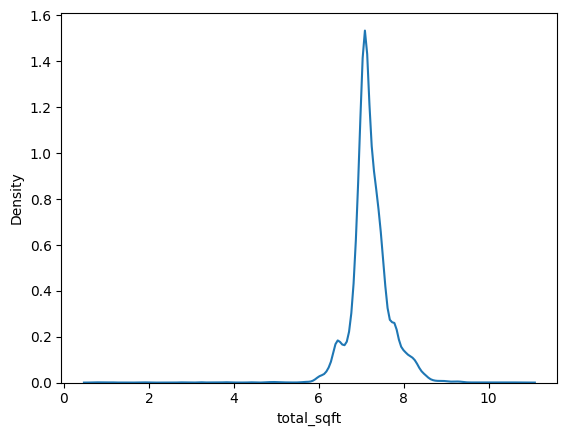

In [49]:
sns.kdeplot(df2['total_sqft'])

<Axes: xlabel='price', ylabel='Density'>

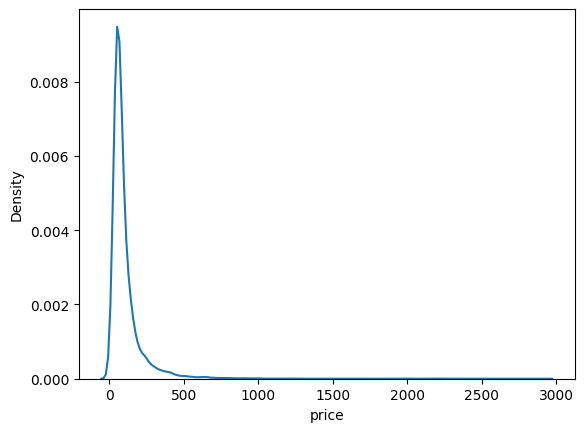

In [50]:
sns.kdeplot(df1['price'])

<Axes: xlabel='price', ylabel='Density'>

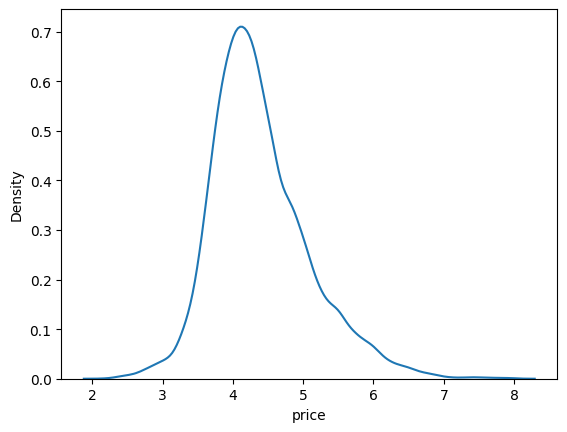

In [51]:
sns.kdeplot(df2['price'])

<Axes: xlabel='bath', ylabel='Density'>

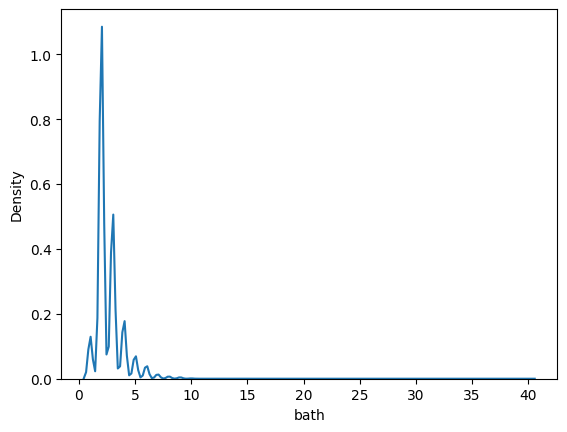

In [52]:
sns.kdeplot(df1['bath'])

<Axes: xlabel='bath', ylabel='Density'>

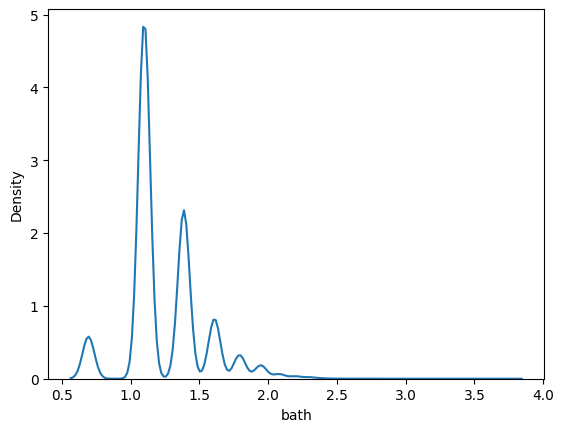

In [53]:
sns.kdeplot(df2['bath'])

In [54]:
df1

,area_type,availability,location,total_sqft,bath,balcony,price,room
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,1262.0,2.0,2.0,47.00,2.0
13314,Super built-up Area,Ready To Move,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0


# **Feature_engineering**

In [55]:
df2['available']=np.where(df2['availability']=='Ready To Move','now','later')

In [56]:
df2.drop(columns='availability',inplace=True)

# **Encoding**

In [57]:
df2.nunique()

,0
area_type,4
location,1254
total_sqft,1855
bath,16
balcony,4
price,1924
room,16
available,2


In [58]:
df2['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [59]:
df2['available'].unique()

array(['later', 'now'], dtype=object)

**Label_encoding**

In [60]:
le=LabelEncoder()
df2['location']=le.fit_transform(df2['location'])

In [61]:
# now we can access the classes_attribute from'le'
location_labels=dict(zip(le.classes_,range(len(le.classes_))))
location_labels

{'1 Annasandrapalya': 0,
 '1 Giri Nagar': 1,
 '1 Ramamurthy Nagar': 2,
 '12th cross srinivas nagar banshankari 3rd stage': 3,
 '1A Block Koramangala': 4,
 '1Channasandra': 5,
 '1Hoysalanagar': 6,
 '1st Block BEL Layout': 7,
 '1st Block HBR Layout': 8,
 '1st Block HRBR Layout': 9,
 '1st Block Jayanagar': 10,
 '1st Block Koramangala': 11,
 '1st Phase JP Nagar': 12,
 '1st Stage Domlur': 13,
 '1st Stage Indira Nagar': 14,
 '1st Stage Radha Krishna Layout': 15,
 '2 Bedroom Furnished Farm House in Kolar Road': 16,
 '2Electronic City Phase II': 17,
 '2nd Block Bel Layout': 18,
 '2nd Block Hbr Layout': 19,
 '2nd Block Hrbr Layout': 20,
 '2nd Block Jayanagar': 21,
 '2nd Block Koramangala': 22,
 '2nd Phase JP Nagar': 23,
 '2nd Phase Judicial Layout': 24,
 '2nd Stage Arekere Mico Layout': 25,
 '2nd Stage Nagarbhavi': 26,
 '2nd phase jp nagar, jp nagar': 27,
 '3rd Block Banashankari': 28,
 '3rd Block HBR Layout': 29,
 '3rd Block Hrbr Layout': 30,
 '3rd Block Jayanagar': 31,
 '3rd Block Koramangala

In [62]:
df2['available']=le.fit_transform(df2['available'])

**1_hot_encoding**

In [63]:
area_type_onehot=pd.get_dummies(df2['area_type'],dtype='int64')
area_type_onehot

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
13312,0,0,0,1
13314,0,0,0,1
13315,1,0,0,0
13317,1,0,0,0


**concating 1-hot encoded and data**

In [64]:
df2=pd.concat([df2,area_type_onehot],axis=1)

In [65]:
df2.drop(columns='area_type',inplace=True)

In [66]:
 df2

,location,total_sqft,bath,balcony,price,room,available,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,393,6.963190,1.098612,0.693147,3.690628,2.0,0,0,0,0,1
1,292,7.863651,1.791759,1.386294,4.795791,4.0,1,0,0,1,0
2,1128,7.273093,1.098612,1.386294,4.143135,3.0,1,1,0,0,0
3,724,7.327781,1.386294,0.693147,4.564348,3.0,1,0,0,0,1
4,683,7.090910,1.098612,0.693147,3.951244,2.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13312,214,7.141245,1.098612,1.098612,3.871201,2.0,1,0,0,0,1
13314,448,7.447751,1.386294,1.386294,4.727388,3.0,1,0,0,0,1
13315,1200,8.147288,1.609438,0.000000,5.446737,5.0,1,1,0,0,0
13317,930,7.040536,1.098612,0.693147,4.110874,2.0,1,1,0,0,0


# **Correlation**

<Axes: >

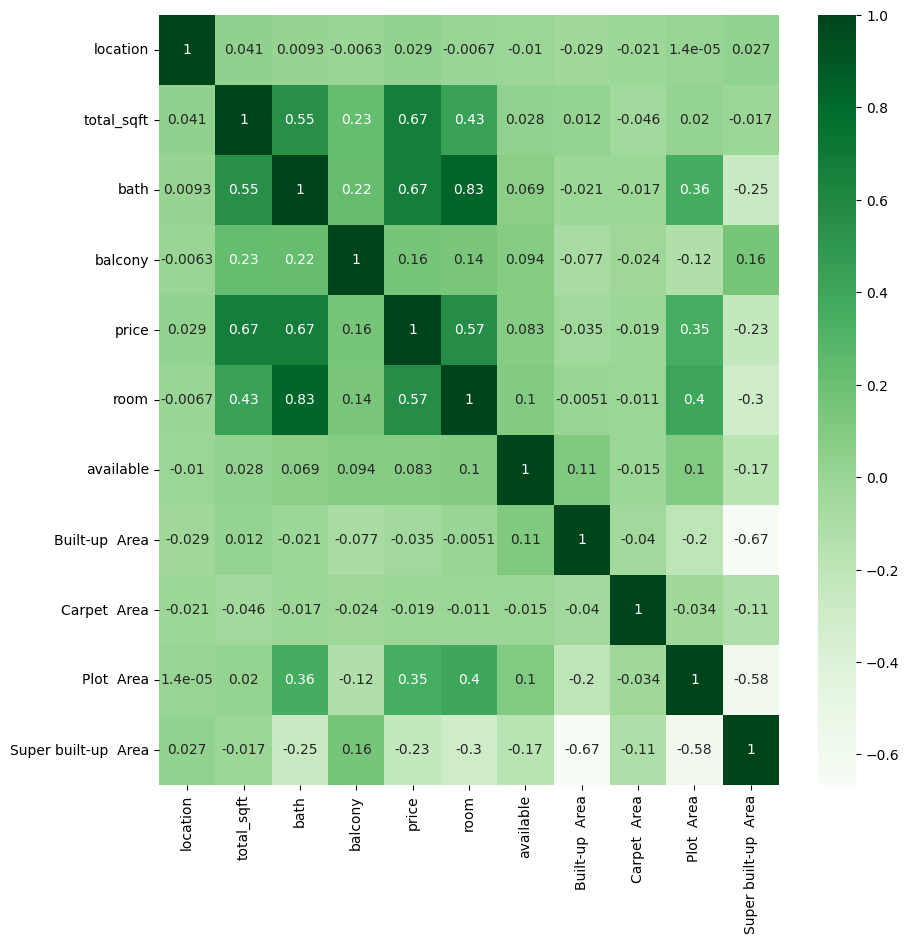

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap((df2.corr()),annot=True,cmap='Greens')

# **Scaling**

## **minmax scaling**

In [68]:
#minmax scaling
minmax_scaler= MinMaxScaler()
data_minmax_scaled=minmax_scaler.fit_transform(df2)

In [69]:
data_minmax_scaled

array([[0.31364725, 0.61645743, 0.13424108, ..., 0.        , 0.        ,
        1.        ],
       [0.2330407 , 0.70498889, 0.36372773, ..., 0.        , 1.        ,
        0.        ],
       [0.90023943, 0.6469264 , 0.13424108, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95770152, 0.73287548, 0.30336485, ..., 0.        , 0.        ,
        0.        ],
       [0.74221868, 0.62406196, 0.13424108, ..., 0.        , 0.        ,
        0.        ],
       [0.69353551, 0.76295089, 0.30336485, ..., 0.        , 0.        ,
        1.        ]])

In [70]:
data_minmax_scaled=pd.DataFrame(data_minmax_scaled,columns=df2.columns)

In [71]:
data_minmax_scaled

,location,total_sqft,bath,balcony,price,room,available,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0.313647,0.616457,0.134241,0.500000,0.258387,0.023810,0.0,0.0,0.0,0.0,1.0
1,0.233041,0.704989,0.363728,1.000000,0.449601,0.071429,1.0,0.0,0.0,1.0,0.0
2,0.900239,0.646926,0.134241,1.000000,0.336679,0.047619,1.0,1.0,0.0,0.0,0.0
3,0.577813,0.652303,0.229487,0.500000,0.409557,0.047619,1.0,0.0,0.0,0.0,1.0
4,0.545092,0.629015,0.134241,0.500000,0.303479,0.023810,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12140,0.170790,0.633963,0.134241,0.792481,0.289630,0.023810,1.0,0.0,0.0,0.0,1.0
12141,0.357542,0.664098,0.229487,1.000000,0.437766,0.047619,1.0,0.0,0.0,0.0,1.0
12142,0.957702,0.732875,0.303365,0.000000,0.562227,0.095238,1.0,1.0,0.0,0.0,0.0
12143,0.742219,0.624062,0.134241,0.500000,0.331098,0.023810,1.0,1.0,0.0,0.0,0.0


**plotting minmax_scaled_data and original_data for comparison**

<Axes: xlabel='room', ylabel='Density'>

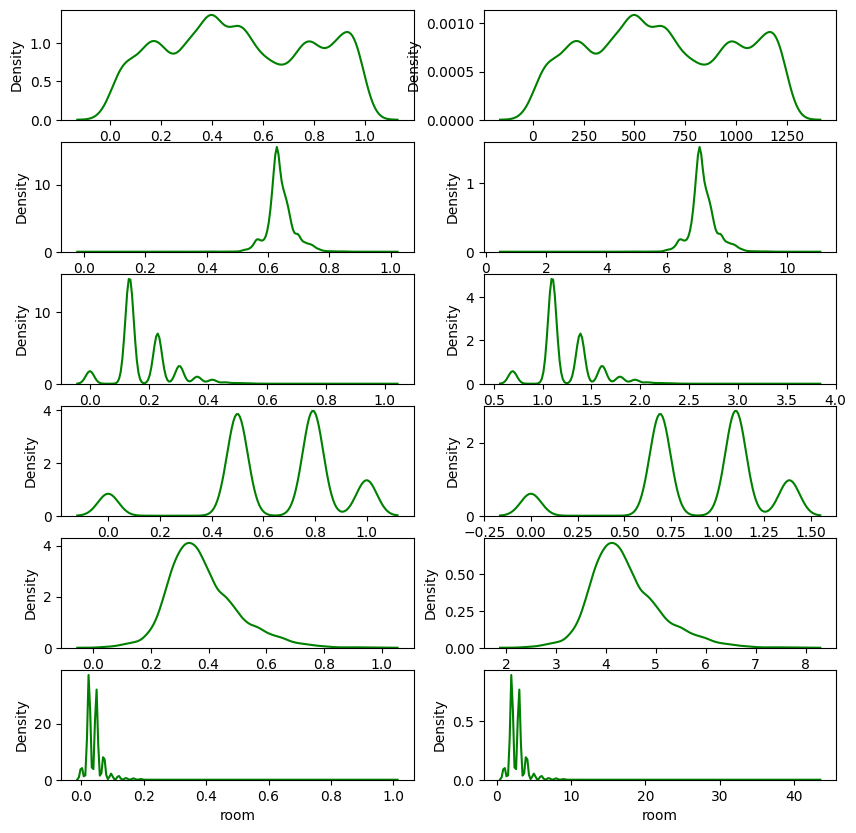

In [72]:
#kde plot of location after scaling
plt.figure(figsize=(10,10))
plt.subplot(6,2,1)
sns.kdeplot(data_minmax_scaled['location'],color='green')
# kde plot of location before scaling
plt.subplot(6,2,2)
sns.kdeplot(df2['location'],color='green')
#kde plot of total_sqft after scaling
plt.subplot(6,2,3)
sns.kdeplot(data_minmax_scaled['total_sqft'],color='green')
# kde plot of total_sqft before scaling
plt.subplot(6,2,4)
sns.kdeplot(df2['total_sqft'],color='green')
#kde plot of bath after scaling
plt.subplot(6,2,5)
sns.kdeplot(data_minmax_scaled['bath'],color='green')
# kde plot of bath before scaling
plt.subplot(6,2,6)
sns.kdeplot(df2['bath'],color='green')
#kde plot of balcony after scaling
plt.subplot(6,2,7)
sns.kdeplot(data_minmax_scaled['balcony'],color='green')
# kde plot of balcony before scaling
plt.subplot(6,2,8)
sns.kdeplot(df2['balcony'],color='green')
#kde plot of price after scaling
plt.subplot(6,2,9)
sns.kdeplot(data_minmax_scaled['price'],color='green')
# kde plot of price before scaling
plt.subplot(6,2,10)
sns.kdeplot(df2['price'],color='green')
#kde plot of room after scaling
plt.subplot(6,2,11)
sns.kdeplot(data_minmax_scaled['room'],color='green')
# kde plot of room before scaling
plt.subplot(6,2,12)
sns.kdeplot(df2['room'],color='green')

## **standard scaler**

In [73]:
#standardization
std_scaler=StandardScaler()
data_std_scaled=std_scaler.fit_transform(df2)

In [74]:
data_std_scaled

array([[-0.70273414, -0.49243623, -0.52286582, ..., -0.08244784,
        -0.41726562,  0.72337129],
       [-0.9887919 ,  1.35696778,  1.92952237, ..., -0.08244784,
         2.396555  , -1.38241594],
       [ 1.37897334,  0.14405436, -0.52286582, ..., -0.08244784,
        -0.41726562, -1.38241594],
       ...,
       [ 1.58289571,  1.93951297,  1.2844599 , ..., -0.08244784,
        -0.41726562, -1.38241594],
       [ 0.81818684, -0.33357904, -0.52286582, ..., -0.08244784,
        -0.41726562, -1.38241594],
       [ 0.64541928,  2.56778202,  1.2844599 , ..., -0.08244784,
        -0.41726562,  0.72337129]])

In [75]:
data_std_scaled=pd.DataFrame(data_std_scaled,columns=df2.columns)
data_std_scaled

,location,total_sqft,bath,balcony,price,room,available,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,-0.702734,-0.492436,-0.522866,-0.542510,-1.006749,-0.614293,-1.960723,-0.481917,-0.082448,-0.417266,0.723371
1,-0.988792,1.356968,1.929522,1.371475,0.587110,1.022160,0.510016,-0.481917,-0.082448,2.396555,-1.382416
2,1.378973,0.144054,-0.522866,1.371475,-0.354146,0.203933,0.510016,2.075045,-0.082448,-0.417266,-1.382416
3,0.234742,0.256375,0.494967,-0.542510,0.253325,0.203933,0.510016,-0.481917,-0.082448,-0.417266,0.723371
4,0.118620,-0.230120,-0.522866,-0.542510,-0.630890,-0.614293,0.510016,-0.481917,-0.082448,-0.417266,0.723371
...,...,...,...,...,...,...,...,...,...,...,...
12140,-1.209708,-0.126739,-0.522866,0.577100,-0.746327,-0.614293,0.510016,-0.481917,-0.082448,-0.417266,0.723371
12141,-0.546960,0.502775,0.494967,1.371475,0.488460,0.203933,0.510016,-0.481917,-0.082448,-0.417266,0.723371
12142,1.582896,1.939513,1.284460,-2.456496,1.525902,1.840386,0.510016,2.075045,-0.082448,-0.417266,-1.382416
12143,0.818187,-0.333579,-0.522866,-0.542510,-0.400673,-0.614293,0.510016,2.075045,-0.082448,-0.417266,-1.382416


**plotting Standard_scaled_data and original_data for comparison**

<Axes: xlabel='room', ylabel='Density'>

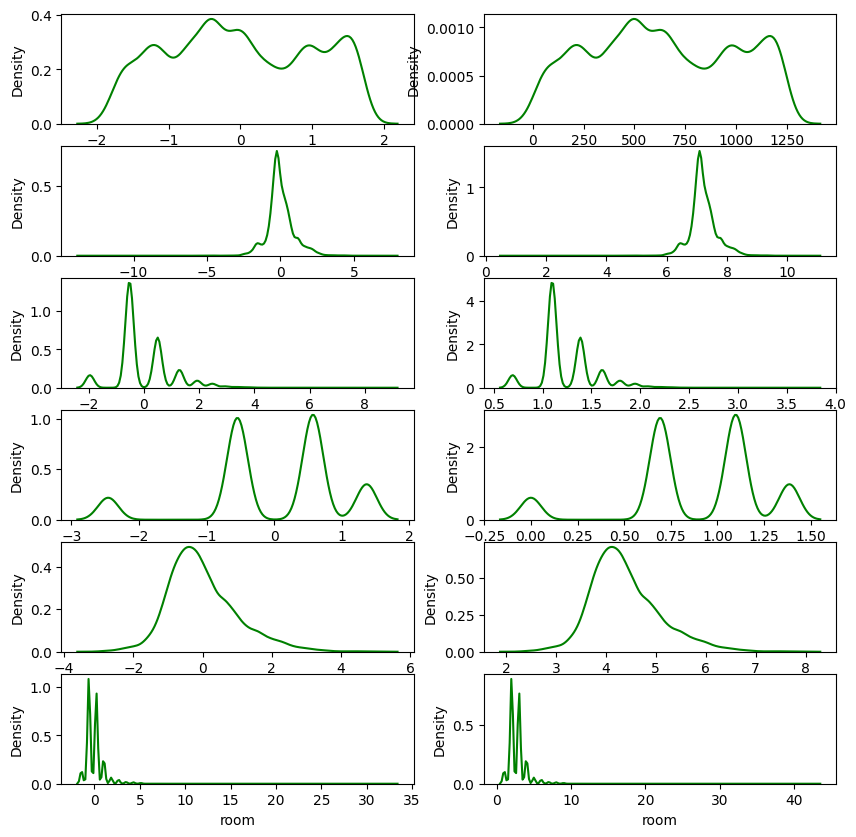

In [76]:
#kde plot of location after scaling
plt.figure(figsize=(10,10))
plt.subplot(6,2,1)
sns.kdeplot(data_std_scaled['location'],color='green')
# kde plot of location before scaling
plt.subplot(6,2,2)
sns.kdeplot(df2['location'],color='green')
#kde plot of total_sqft after scaling
plt.subplot(6,2,3)
sns.kdeplot(data_std_scaled['total_sqft'],color='green')
# kde plot of total_sqft before scaling
plt.subplot(6,2,4)
sns.kdeplot(df2['total_sqft'],color='green')
#kde plot of bath after scaling
plt.subplot(6,2,5)
sns.kdeplot(data_std_scaled['bath'],color='green')
# kde plot of bath before scaling
plt.subplot(6,2,6)
sns.kdeplot(df2['bath'],color='green')
#kde plot of balcony after scaling
plt.subplot(6,2,7)
sns.kdeplot(data_std_scaled['balcony'],color='green')
# kde plot of balcony before scaling
plt.subplot(6,2,8)
sns.kdeplot(df2['balcony'],color='green')
#kde plot of price after scaling
plt.subplot(6,2,9)
sns.kdeplot(data_std_scaled['price'],color='green')
# kde plot of price before scaling
plt.subplot(6,2,10)
sns.kdeplot(df2['price'],color='green')
#kde plot of room after scaling
plt.subplot(6,2,11)
sns.kdeplot(data_std_scaled['room'],color='green')
# kde plot of room before scaling
plt.subplot(6,2,12)
sns.kdeplot(df2['room'],color='green')

## **Robust_scaling**

In [77]:
robust_scaler=RobustScaler()
data_robust_scaled=robust_scaler.fit_transform(df2)

In [78]:
data_robust_scaled

array([[-0.39383562, -0.43651571,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.56678082,  1.76126452,  2.40942084, ...,  0.        ,
         1.        , -1.        ],
       [ 0.86472603,  0.31987198,  0.        , ...,  0.        ,
         0.        , -1.        ],
       ...,
       [ 0.9880137 ,  2.45354501,  1.77566026, ...,  0.        ,
         0.        , -1.        ],
       [ 0.52568493, -0.24773425,  0.        , ...,  0.        ,
         0.        , -1.        ],
       [ 0.42123288,  3.20016246,  1.77566026, ...,  0.        ,
         0.        ,  0.        ]])

In [79]:
data_robust_scaled=pd.DataFrame(data_robust_scaled,columns=df2.columns)
data_robust_scaled

,location,total_sqft,bath,balcony,price,room,available,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,-0.393836,-0.436516,0.000000,-1.000000,-0.696126,-1.0,-1.0,0.0,0.0,0.0,0.0
1,-0.566781,1.761265,2.409421,0.709511,0.648739,1.0,0.0,0.0,0.0,1.0,-1.0
2,0.864726,0.319872,0.000000,0.709511,-0.145474,0.0,0.0,1.0,0.0,0.0,-1.0
3,0.172945,0.453350,1.000000,-1.000000,0.367098,0.0,0.0,0.0,0.0,0.0,0.0
4,0.102740,-0.124786,0.000000,-1.000000,-0.378985,-1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12140,-0.700342,-0.001932,0.000000,0.000000,-0.476388,-1.0,0.0,0.0,0.0,0.0,0.0
12141,-0.299658,0.746166,1.000000,0.709511,0.565500,0.0,0.0,0.0,0.0,0.0,0.0
12142,0.988014,2.453545,1.775660,-2.709511,1.440872,2.0,0.0,1.0,0.0,0.0,-1.0
12143,0.525685,-0.247734,0.000000,-1.000000,-0.184732,-1.0,0.0,1.0,0.0,0.0,-1.0


**plotting minmax_scaled_data and original_data for comparison**

<Axes: xlabel='room', ylabel='Density'>

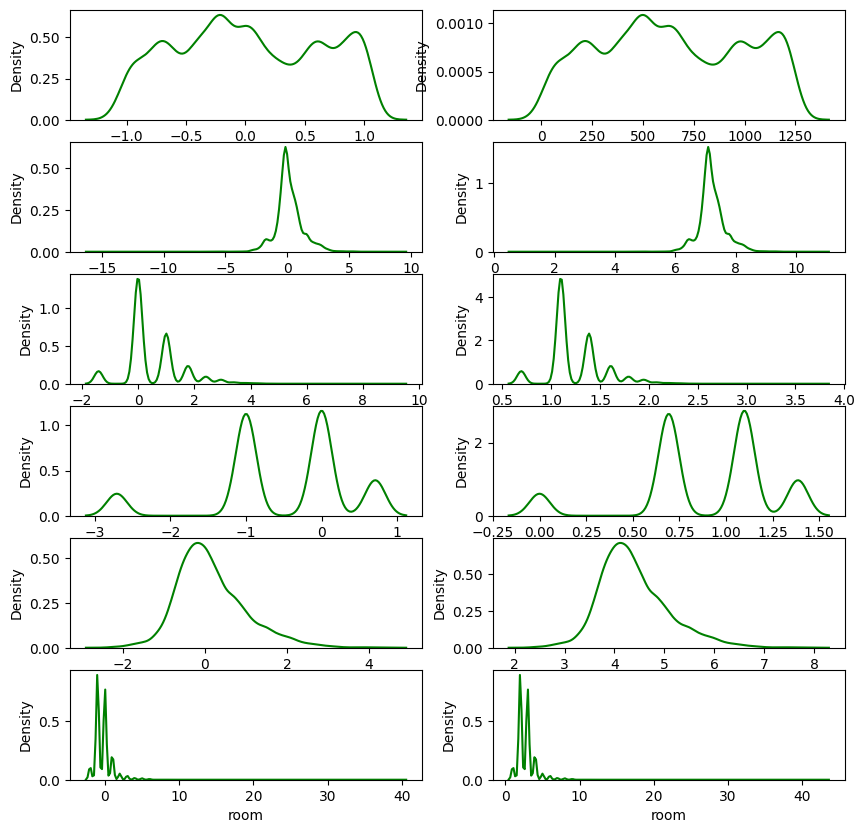

In [80]:
#kde plot of location after scaling
plt.figure(figsize=(10,10))
plt.subplot(6,2,1)
sns.kdeplot(data_robust_scaled['location'],color='green')
# kde plot of location before scaling
plt.subplot(6,2,2)
sns.kdeplot(df2['location'],color='green')
#kde plot of total_sqft after scaling
plt.subplot(6,2,3)
sns.kdeplot(data_robust_scaled['total_sqft'],color='green')
# kde plot of total_sqft before scaling
plt.subplot(6,2,4)
sns.kdeplot(df2['total_sqft'],color='green')
#kde plot of bath after scaling
plt.subplot(6,2,5)
sns.kdeplot(data_robust_scaled['bath'],color='green')
# kde plot of bath before scaling
plt.subplot(6,2,6)
sns.kdeplot(df2['bath'],color='green')
#kde plot of balcony after scaling
plt.subplot(6,2,7)
sns.kdeplot(data_robust_scaled['balcony'],color='green')
# kde plot of balcony before scaling
plt.subplot(6,2,8)
sns.kdeplot(df2['balcony'],color='green')
#kde plot of price after scaling
plt.subplot(6,2,9)
sns.kdeplot(data_robust_scaled['price'],color='green')
# kde plot of price before scaling
plt.subplot(6,2,10)
sns.kdeplot(df2['price'],color='green')
#kde plot of room after scaling
plt.subplot(6,2,11)
sns.kdeplot(data_robust_scaled['room'],color='green')
# kde plot of room before scaling
plt.subplot(6,2,12)
sns.kdeplot(df2['room'],color='green')

# **Dimensionality_Reduction**

 **Feature selection**

In [81]:
corrr=df2.corr()

<Axes: >

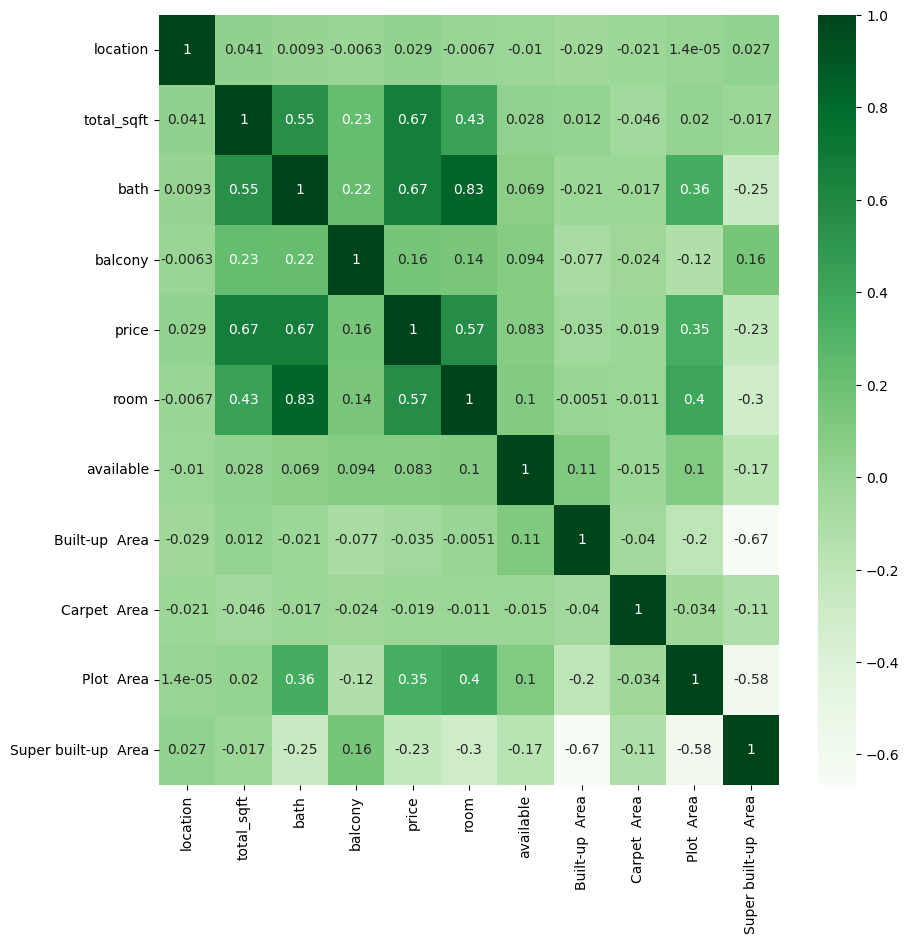

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(corrr,annot=True,cmap='Greens')

**heatmap of data_minmax_scaled data**

<Axes: >

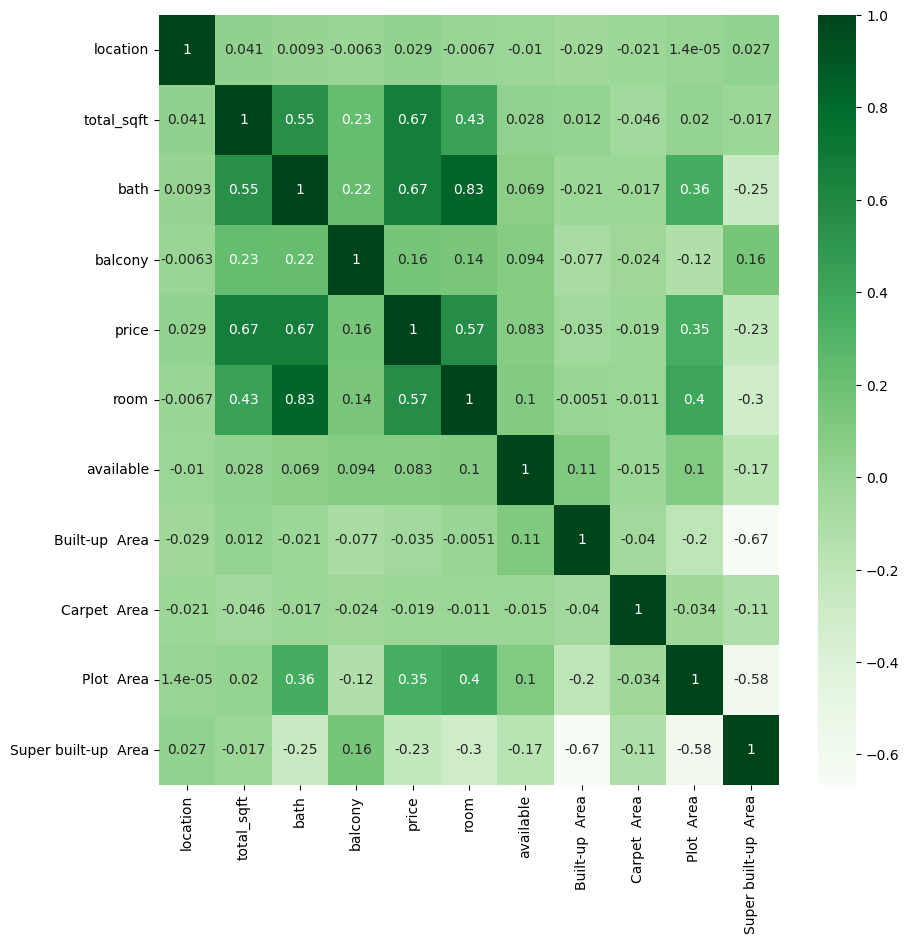

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap((data_minmax_scaled.corr()),annot=True,cmap='Greens')

**hetamap of standardized data**

<Axes: >

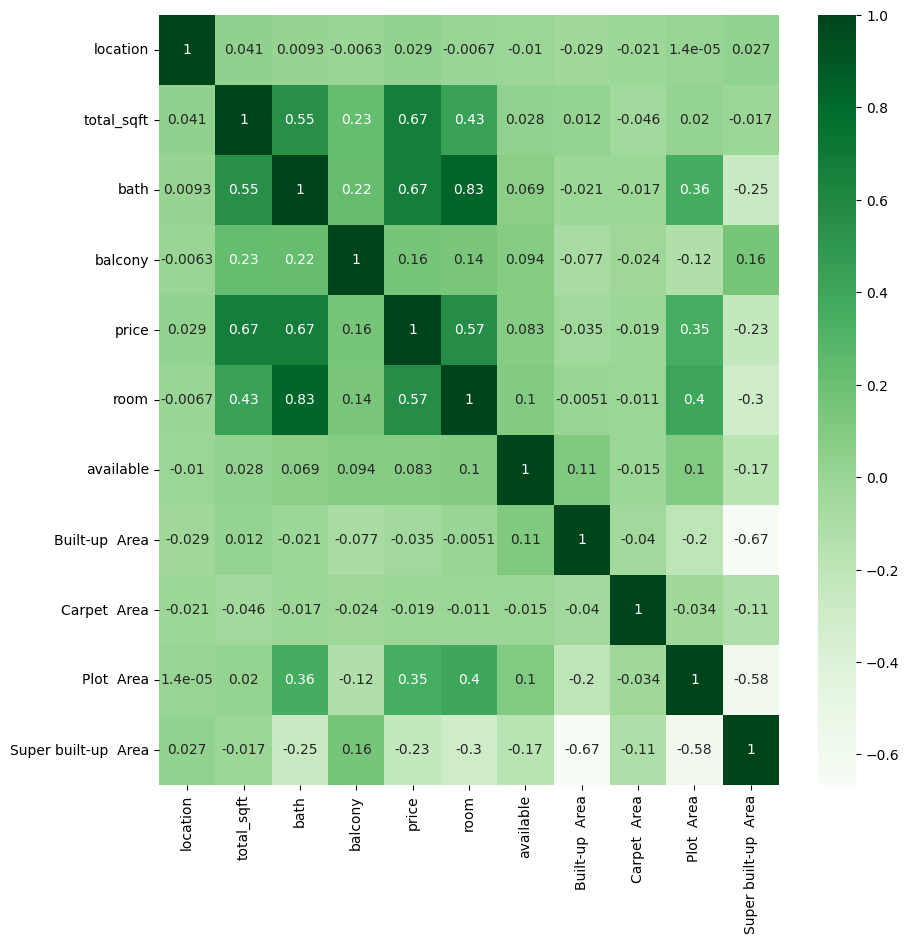

In [84]:
plt.figure(figsize=(10,10))
sns.heatmap((data_std_scaled.corr()),annot=True,cmap='Greens')

**heatmap of robust scaled data**

<Axes: >

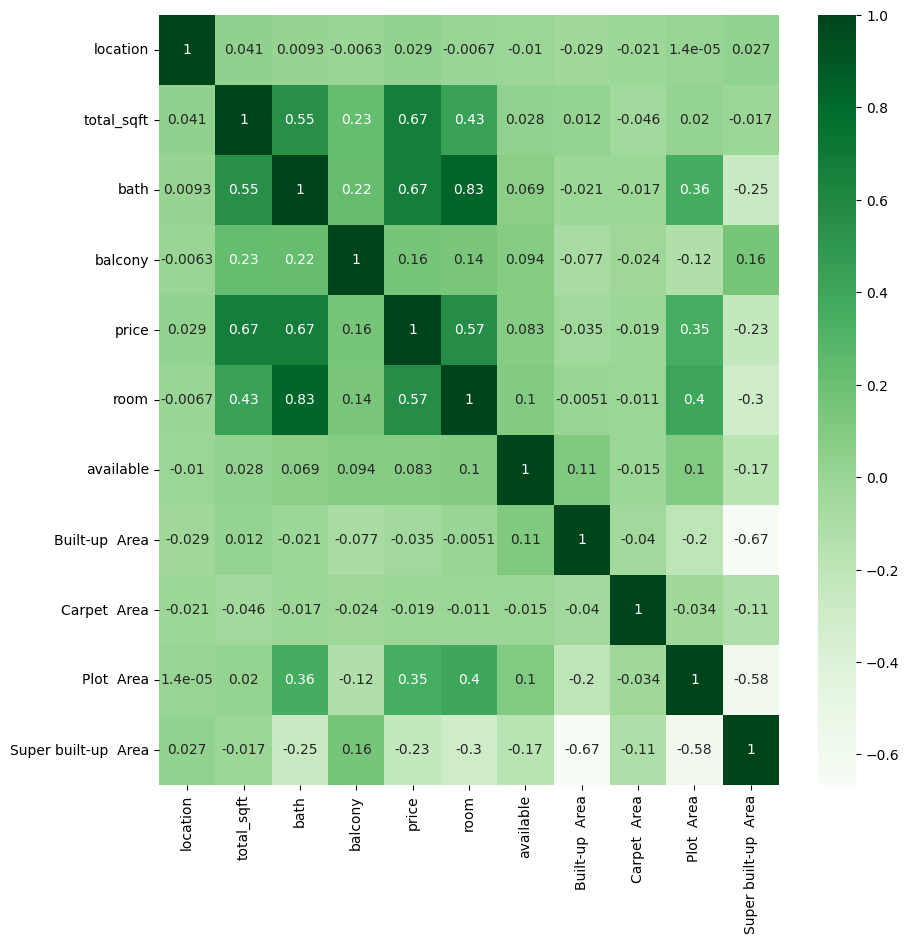

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap((data_robust_scaled.corr()),annot=True,cmap='Greens')

In [86]:
data_std_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12145 entries, 0 to 12144
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              12145 non-null  float64
 1   total_sqft            12145 non-null  float64
 2   bath                  12145 non-null  float64
 3   balcony               12145 non-null  float64
 4   price                 12145 non-null  float64
 5   room                  12145 non-null  float64
 6   available             12145 non-null  float64
 7   Built-up  Area        12145 non-null  float64
 8   Carpet  Area          12145 non-null  float64
 9   Plot  Area            12145 non-null  float64
 10  Super built-up  Area  12145 non-null  float64
dtypes: float64(11)
memory usage: 1.0 MB


In [87]:
data_std_scaled.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'price', 'room',
       'available', 'Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'],
      dtype='object')

In [88]:
df_selected=data_std_scaled.drop(columns=['Super built-up  Area','Carpet  Area','Built-up  Area','available','location'])

In [89]:
df_selected

,total_sqft,bath,balcony,price,room,Plot Area
0,-0.492436,-0.522866,-0.542510,-1.006749,-0.614293,-0.417266
1,1.356968,1.929522,1.371475,0.587110,1.022160,2.396555
2,0.144054,-0.522866,1.371475,-0.354146,0.203933,-0.417266
3,0.256375,0.494967,-0.542510,0.253325,0.203933,-0.417266
4,-0.230120,-0.522866,-0.542510,-0.630890,-0.614293,-0.417266
...,...,...,...,...,...,...
12140,-0.126739,-0.522866,0.577100,-0.746327,-0.614293,-0.417266
12141,0.502775,0.494967,1.371475,0.488460,0.203933,-0.417266
12142,1.939513,1.284460,-2.456496,1.525902,1.840386,-0.417266
12143,-0.333579,-0.522866,-0.542510,-0.400673,-0.614293,-0.417266


**plotting heatmap after feature selection**

<Axes: >

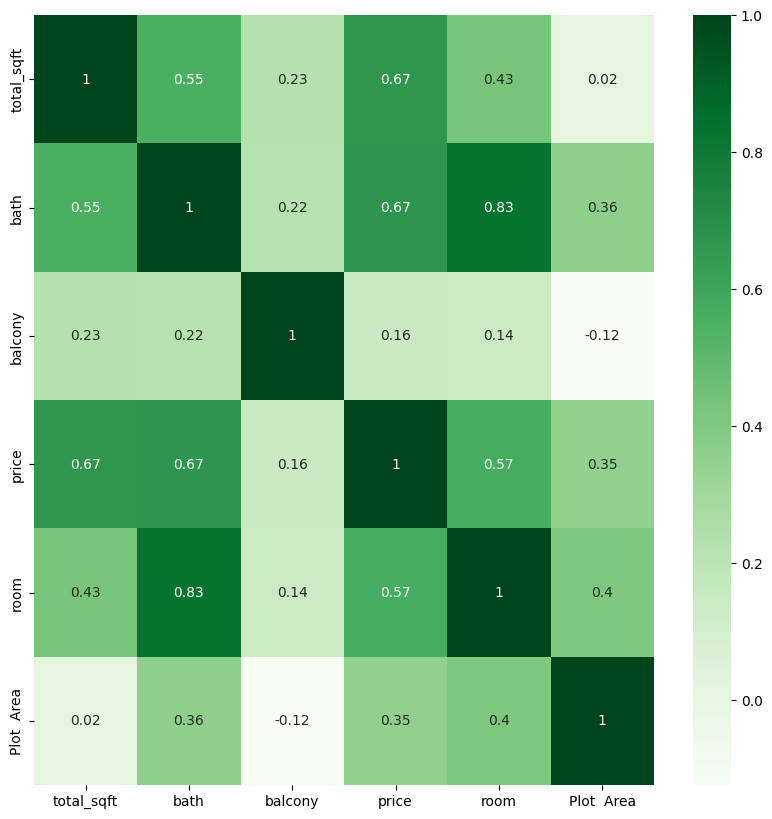

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap((df_selected.corr()),annot=True,cmap='Greens')

In [91]:
df3=df2.copy()

## **PCA**

In [92]:
X=data_std_scaled.drop(columns='price')
Y=data_std_scaled['price']

In [93]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

In [94]:
variance=pca.explained_variance_ratio_
print(variance)

[0.26444153 0.17680222]


<Axes: >

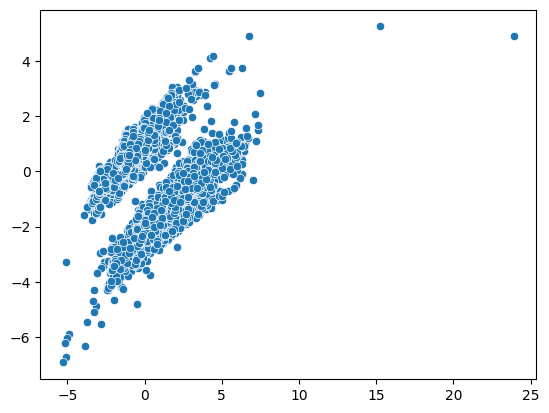

In [95]:
sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1])

In [96]:
total_variance=sum(variance)
print(total_variance)

0.4412437481749285


In [97]:
print(pca_data)

[[-1.55893818  0.42498918]
 [ 3.60410974  0.35770447]
 [ 0.62901626 -1.30416773]
 ...
 [ 2.69378752 -1.53440829]
 [-0.18599344 -2.33193227]
 [ 1.3674701   2.12161375]]


In [98]:
pd.DataFrame(pca_data)

,0,1
0,-1.558938,0.424989
1,3.604110,0.357704
2,0.629016,-1.304168
3,0.022437,0.725077
4,-1.137358,0.224765
...,...,...
12140,-0.980167,0.601899
12141,0.317007,1.481810
12142,2.693788,-1.534408
12143,-0.185993,-2.331932


# **saving file into csv format**

In [99]:
print(df2)

       location  total_sqft      bath   balcony     price  room  available  \
0           393    6.963190  1.098612  0.693147  3.690628   2.0          0   
1           292    7.863651  1.791759  1.386294  4.795791   4.0          1   
2          1128    7.273093  1.098612  1.386294  4.143135   3.0          1   
3           724    7.327781  1.386294  0.693147  4.564348   3.0          1   
4           683    7.090910  1.098612  0.693147  3.951244   2.0          1   
...         ...         ...       ...       ...       ...   ...        ...   
13312       214    7.141245  1.098612  1.098612  3.871201   2.0          1   
13314       448    7.447751  1.386294  1.386294  4.727388   3.0          1   
13315      1200    8.147288  1.609438  0.000000  5.446737   5.0          1   
13317       930    7.040536  1.098612  0.693147  4.110874   2.0          1   
13318       869    8.453188  1.609438  0.693147  6.192362   4.0          0   

       Built-up  Area  Carpet  Area  Plot  Area  Super built-up

In [100]:
df2.to_csv('encoded_bengeluru_hs_price sanah_rahman.csv',index=False)

# **pca data Modeling**

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pca_data,Y,test_size=0.2,random_state=42)

In [102]:
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# r2_score=
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [103]:
y_pred=model.predict(x_test)

## **Mean Absolute Error**

In [104]:
 from sklearn.metrics import mean_absolute_error
 mae=mean_absolute_error(y_test,y_pred)
 print('MAE :',mae)

MAE : 0.5067485938924929


## **Mean Squared Error**

In [105]:
 from sklearn.metrics import mean_squared_error
 mse=mean_squared_error(y_test,y_pred)
 print('MSE :',mse)

MSE : 0.4893639789733892


# **RMSE**

In [106]:
rmse=np.sqrt(mse)
print('RMSE :',rmse)

RMSE : 0.6995455517501267


# **modeling with the selected data**

In [107]:
x=df.drop(columns='price')
y=df['price']

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_selected,Y,test_size=0.2,random_state=42)

In [109]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [110]:
y_pred=model.predict(x_test)

## **mae**

In [111]:
 from sklearn.metrics import mean_absolute_error
 mae=mean_absolute_error(y_test,y_pred)
 print('MAE :',mae)

MAE : 1.171587528515577e-15


## **mse**

In [112]:
 from sklearn.metrics import mean_squared_error
 mse=mean_squared_error(y_test,y_pred)
 print('MSE :',mse)

MSE : 3.9882524396466495e-30


## **rmse**

In [113]:
rmse=np.sqrt(mse)
print('RMSE :',rmse)

RMSE : 1.9970609504085372e-15
